# INTERNSHIP -DATA SCIENCE(sep_2023)
## TASK-3 - Prediction Using Decision Tree Algorithm
## Kalyani Desale

# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier  # For classification tasks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree


# Import The Dataset

In [2]:
dataset=pd.read_csv("C:/Users//KALYANI//Desktop//internship/iris.csv") 
dataset
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

In [6]:
count=dataset['Species'].value_counts()
count.to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
label=count.index.tolist()
val=count.values.tolist()

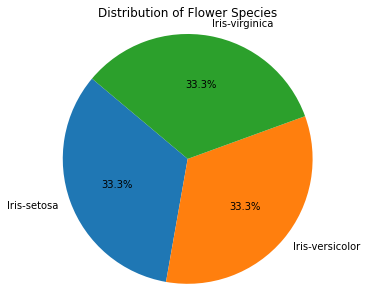

In [8]:
species_counts = dataset['Species'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Flower Species')
plt.show()

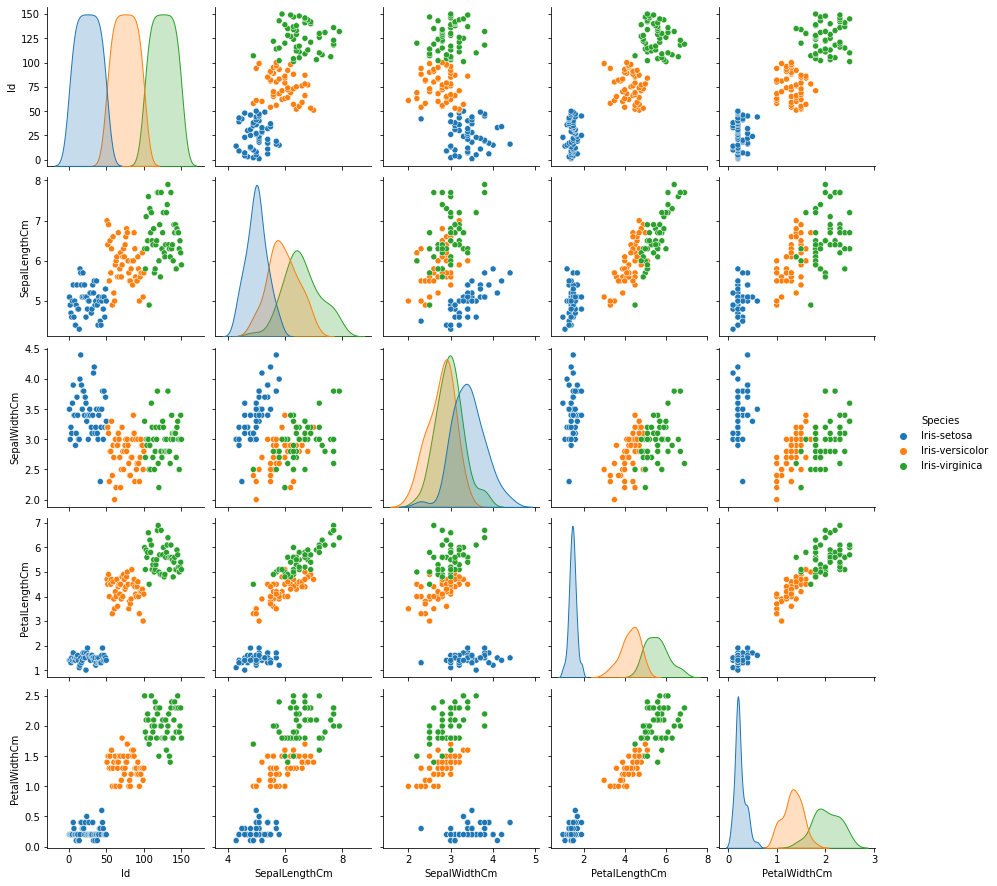

In [9]:
sns.pairplot(data=dataset,hue='Species')
plt.show()

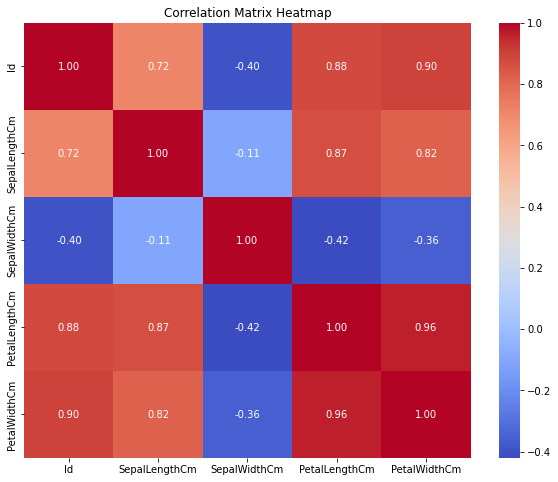

In [10]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Created

In [11]:
x=dataset.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=(dataset.iloc[:,5])
y.head().to_frame()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [13]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test

(array([[ 2.24968346e+00, -1.05056946e+00,  1.78634131e+00,
          1.44795564e+00],
        [-1.73673948e-01,  1.72626612e+00, -1.17067529e+00,
         -1.18150376e+00],
        [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
         -1.31297673e+00],
        [-1.26418478e+00, -1.24957601e-01, -1.34127240e+00,
         -1.18150376e+00],
        [-7.79513300e-01, -8.19166497e-01,  8.03701950e-02,
          2.64698913e-01],
        [-9.00681170e-01,  8.00654259e-01, -1.28440670e+00,
         -1.31297673e+00],
        [-4.16009689e-01,  1.03205722e+00, -1.39813811e+00,
         -1.31297673e+00],
        [ 2.24968346e+00,  1.72626612e+00,  1.67260991e+00,
          1.31648267e+00],
        [ 1.28034050e+00,  1.06445364e-01,  9.33355755e-01,
          1.18500970e+00],
        [ 1.76501198e+00, -3.56360566e-01,  1.44514709e+00,
          7.90590793e-01],
        [ 6.74501145e-01, -5.87763531e-01,  1.04708716e+00,
          1.31648267e+00],
        [ 4.32165405e-01, -5.87763531e-01, 

# Create and Train the Decision Tree Model:

In [15]:
model = DecisionTreeClassifier()  # For classification tasks
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Make Predictions:

In [16]:
y_pred = model.predict(X_test) 

# Evaluate the Model:

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


# Make Confusion Matrix

In [18]:
confusion = confusion_matrix(y_test, y_pred)
print(f'confusion: {confusion}')

confusion: [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [19]:
column_names = dataset.columns
print(column_names)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [20]:
col=dataset.columns.tolist()
print(col)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


# Use the plot_tree function to visualize the Decision Tree

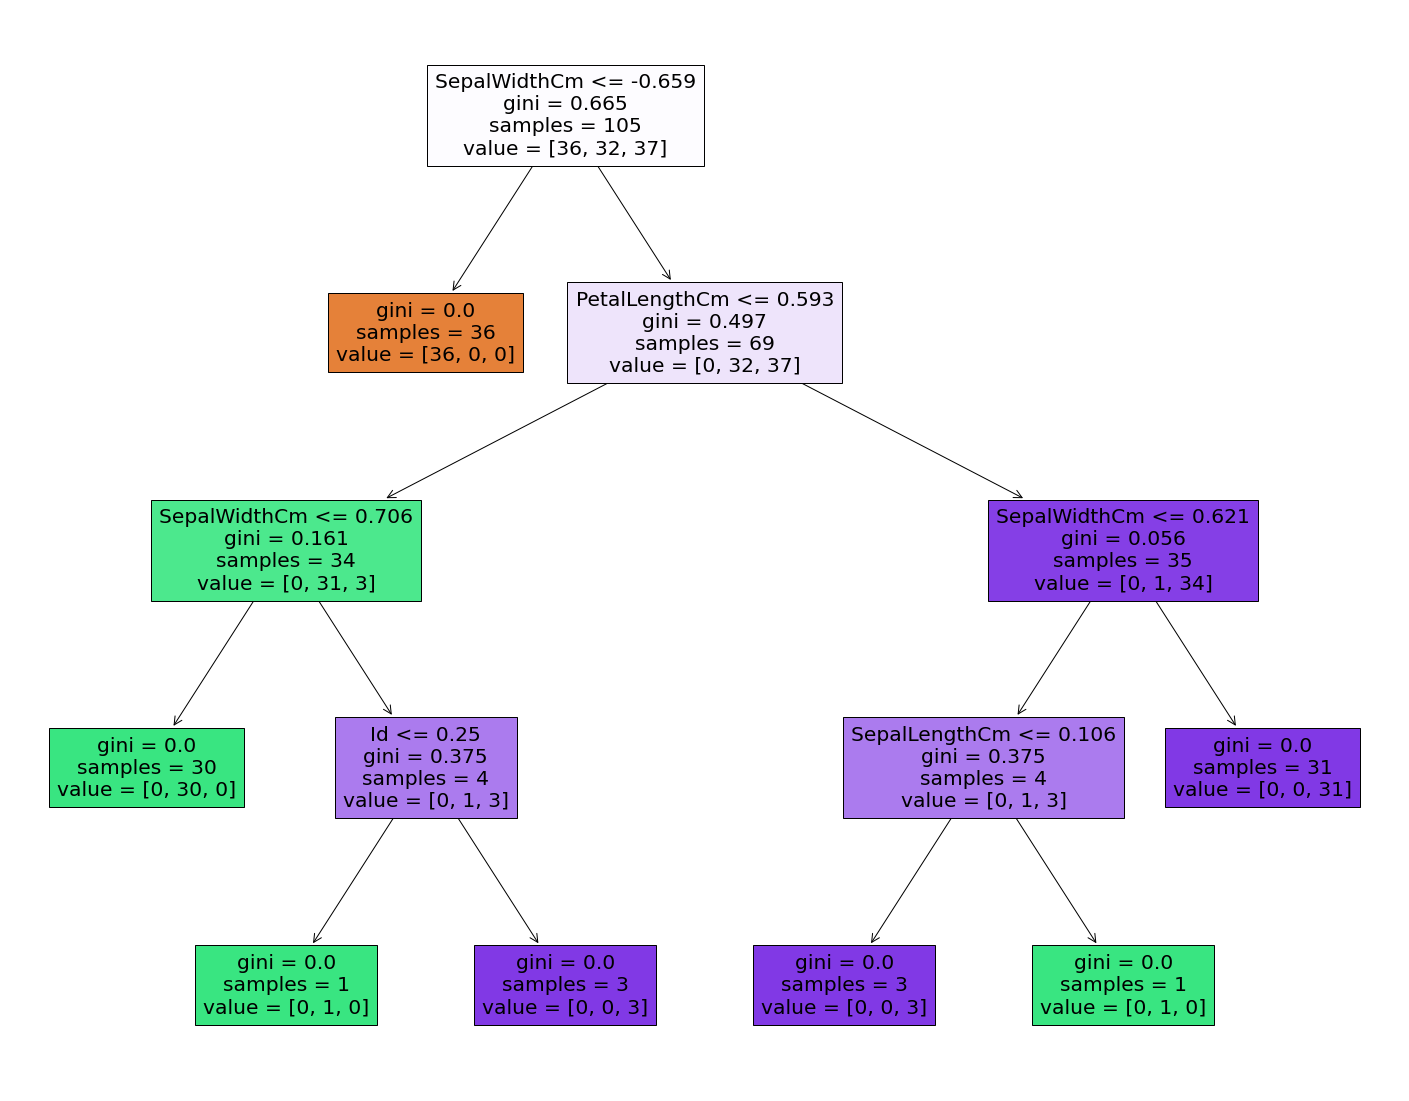

In [21]:
plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=col, filled=True)

# Display the tree plot
plt.show()